<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/Naive_Bayes/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notes**

[open in browser]('https://onedrive.live.com/view.aspx?resid=B7999797B4FEAE64%211201&id=documents&wd=target%28Naive%20Bayes.one%7C5A03ED1E-CF67-4C12-AD8B-C16112311CD6%2FIntro%7C26B8385D-A330-42F6-9B6F-C565F43A2472%2F%29')

[open in OneNote]('onenote:https://d.docs.live.net/b7999797b4feae64/Documents/DS%20December/Naive%20Bayes.one#Intro&section-id={5A03ED1E-CF67-4C12-AD8B-C16112311CD6}&page-id={26B8385D-A330-42F6-9B6F-C565F43A2472}&end')

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Scratch

i used this to explane implementation **play_tennis**

In [ ]:
iris = px.data.iris()

In [ ]:
X = iris.drop(['species_id', 'species'], axis = 1)
Y = iris['species_id']

In [ ]:
from sklearn.metrics import accuracy_score

class NaiveBayes():
    def __init__(self):
        pass
    
    def fit(self, X, Y):
        self.label_type = Y.dtype
        self.prob = {}
        self.label_prob = Y.value_counts(normalize=True)
        self.features = X.columns

        for col in X.columns:
            self.prob[col] = pd.crosstab(X[col], Y, normalize = 'columns')
        
        return self.prob
    
    def pred(self, x):
        
        maxprob = 0
        maxpab = ''
        for lab in self.label_prob.index:
            currprob = self.label_prob[lab]
            currlab = lab
            
            for fet in self.features:
                p = self.prob[fet][lab][x[fet]]
                currprob = currprob*p
                
            if currprob > maxprob:
                maxprob = currprob
                maxlab = currlab
            
        return maxlab

    def predict(self, X):
        y_pred = np.full(X.shape[0], 0,dtype = self.label_type)

        for i, (_, x) in enumerate(X.iterrows()):
            lab = self.pred(x)
            y_pred[i] = lab
        
        return y_pred
    
    def score(self, X, Y):
        return accuracy_score(self.predict(X), Y)

In [ ]:
model = NaiveBayes()
prob = model.fit(X, Y)

In [ ]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
model.score(X, Y)

0.9666666666666667

In [ ]:
from sklearn.naive_bayes import MultinomialNB

modelsk = MultinomialNB()
modelsk.fit(X, Y)
# accuracy_score(modelsk.predict(X), Y)
modelsk.score(X, Y)

0.9533333333333334

# Project

In [ ]:
data = df = pd.read_csv("https://raw.githubusercontent.com/DependerKumarSoni/Naive-Bayes/main/adult.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Data Cleaning

In [ ]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names
df.sample(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32017,18,Private,41973,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,5,United-States,<=50K
4894,38,Self-emp-inc,257250,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,United-States,<=50K


**Objective**
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.


**1. Categorical Attributes**

*   **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category
*   **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree
*   **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status
*   **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation
*   **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family
*   **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual
*   **sex**: Female, Male.
*   **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country


**2. Continuous Attributes**

*   **age**: continuous.
Age of an individual
*   **fnlwgt**: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
*   **capital-gain**: continuous.
*   **capital-loss**: continuous.
*   **hours-per-week**: continuous.
Individual's working hour per week

In [ ]:
attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == ' ?'] = most_freq_attrib

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data['occupation'].replace({' ?': np.nan}, inplace = True)
data['native_country'].replace({' ?': np.nan}, inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = 'most_frequent')
data[['occupation', 'native_country']] = si.fit_transform(data[['occupation', 'native_country']])

In [ ]:
data['income'] = np.where(data['income'] == ' <=50K', 0, 1)

## EDA

## Feature Engineering

In [ ]:
num_col = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [ ]:
y = data['income']

In [ ]:
num_data = data[num_col]
cat_data = data.drop(num_col, axis = 1).drop(['income'], axis = 1)

## Select and Train

### Numerical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


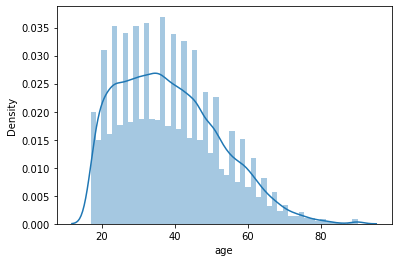

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


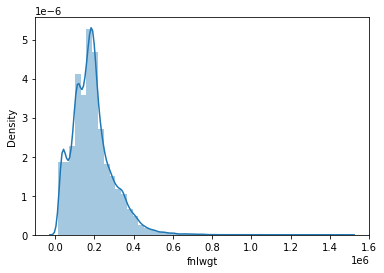

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


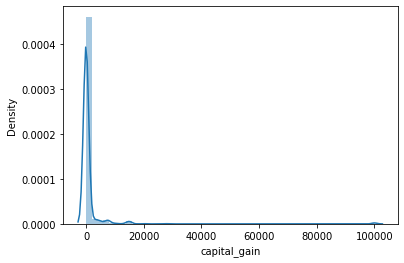

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


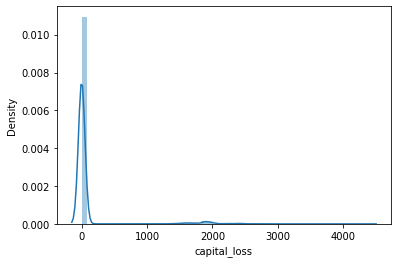

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


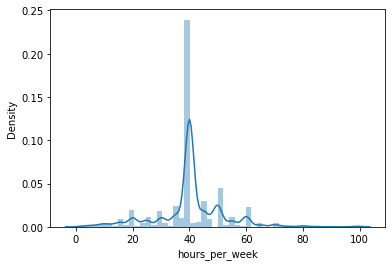

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_col:
    sns.distplot(num_data[col])
    plt.show()

In [ ]:
X = num_data.drop(['capital_gain', 'capital_loss'], axis = 1)
X['capital_change'] = data['capital_gain']-data['capital_loss']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler

a = RobustScaler().fit_transform(X)
X = pd.DataFrame(a, columns = X.columns)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=20)

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
gnb.score(xtest, ytest)

0.7896805896805896

### Categorical 

In [ ]:
Z = cat_data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# Label Encoder Can be used here

od = OrdinalEncoder()
Z[Z.columns] = od.fit_transform(Z)

In [ ]:
Z.sample(7)

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country
9899,3.0,11.0,8.0,2.0,3.0,0.0,4.0,1.0,38.0
3938,3.0,11.0,8.0,2.0,6.0,0.0,4.0,1.0,38.0
12103,3.0,11.0,8.0,4.0,0.0,4.0,4.0,0.0,38.0
25224,3.0,0.0,5.0,0.0,9.0,1.0,4.0,0.0,38.0
31724,3.0,15.0,9.0,0.0,0.0,4.0,2.0,0.0,38.0
12225,5.0,11.0,8.0,2.0,11.0,0.0,4.0,1.0,38.0
11573,3.0,11.0,8.0,0.0,2.0,1.0,4.0,1.0,38.0


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(Z, y, random_state=20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
print('Test', mnb.score(xtest, ytest))
print('Train', mnb.score(xtrain, ytrain))

Test 0.7932432432432432
Train 0.8002866502866502


### MIX type features

In [ ]:
!pip install mixed-naive-bayes

In [ ]:
X = num_data
X[X.columns] = RobustScaler().fit_transform(X)

Y = cat_data
od = OrdinalEncoder()
Y[Y.columns] = od.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
X = X.join(Y)
X.sample(7)

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country
6658,0.45,0.819674,5013.0,0.0,2.0,3.0,11.0,8.0,2.0,11.0,0.0,4.0,1.0,38.0
14669,-0.75,0.310611,0.0,0.0,-0.6,3.0,11.0,8.0,4.0,13.0,1.0,4.0,1.0,38.0
8413,0.40,-0.815539,0.0,0.0,0.0,3.0,15.0,9.0,2.0,2.0,2.0,1.0,1.0,29.0
1795,-0.25,-1.197487,0.0,0.0,0.0,3.0,9.0,12.0,4.0,0.0,1.0,4.0,1.0,38.0
30835,-0.35,1.363294,0.0,1590.0,8.0,3.0,14.0,14.0,4.0,9.0,1.0,4.0,1.0,38.0
31937,0.60,1.439513,0.0,0.0,4.0,5.0,9.0,12.0,2.0,9.0,0.0,4.0,1.0,38.0
27286,0.15,-0.517778,0.0,0.0,0.0,3.0,9.0,12.0,4.0,11.0,3.0,4.0,1.0,38.0


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=20)

In [ ]:
from mixed_naive_bayes import MixedNB

model = MixedNB(categorical_features=np.arange(5, 14))
model.fit(xtrain, ytrain)

[ 8 16 16  7 14  6  5  2 41]


MixedNB(alpha=0.5, var_smoothing=1e-09)

In [ ]:
model.score(xtest, ytest)

0.8242014742014742